### Predict Accident Severity

Lorena Wang

### Introduction


Road traffic injuries and deaths has been a global severe problem. According to the statistic report from World Health Organization (WHO):
+ Every year 1.35 million people are killed as a result of a road traffic crash.
+ Between 20 and 50 million people suffer non-fatal injuries, which most can lead to disabilities in their life.
+ Road traffic injuries are estimated to be the eighth leading cause of death globally for all age groups and the leading cause of death for children and young people aged 5–29 years old. More people now die in road traffic crashes than from HIV/AIDS.

This severe problem needs our attention, since human lives are irreplaceable. Thanks to the development of data science, we can get the insight of the traffic collision data and predict the severity of car accidents based on the complex various factors, such as weather, road condition, light condition, speeding etc. Machine Learning is an ideal method as this is a scientific approach for modelling and predicting the parameter of interest demanding only a low budget. We can also identify which factors have more impact on this problem and people can take actions to them. 

This project is aimed to use Machine Learning to build models to predict the severity of the traffic accidents according to the factors in the car collision data in the city of Seattle, USA. This predictive model can be applied to multiple practical conditions to save life, such as safe route planning, emergency signal light control, vehicle allocation, signals placement or even AI car design. 
This study of car accidents in Seattle can help other cities in similar conditions, and the methodology can be used widely among other countries.  The stakeholders of the present problem involve state and local government agencies, non-governmental organizations, regional authorities, AI technology companies, and even individuals.



### Data

The car collision data is obtained from Seattle Govt’s website, which records the severity of the accident and the current factors, including road condition, light, speed,weather,etc. The detailed information can be checked in Data Attributes.

Data Source: http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data

Data Catalogue: https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

### Data Attributes

| Attribute  | Data type, length | Description |
| -----------| ----------------- | ----------- |
| OBJECTID |ObjectID|ESRI unique identifier|
|INCKEY |Long| A unique key for the incident |
|COLDETKEY |Long| Secondary key for the incident |
|ADDRTYPE|Text, 12| Collision address type:• Alley• Block• Intersection|
|INTKEY| Double Key| that corresponds to the intersection associated with a collision |
|LOCATION|Text, 255|Description of the general location of the collision|
|EXCEPTRSNCODE|Text, 10|Not specified
EXCEPTRSNDESC|Text, 300|Not specified
SEVERITYCODE|Text, 100|A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown
SEVERITYDESC|Text|A detailed description of the severity of the collision
COLLISIONTYPE|Text, 300|Collision type
PERSONCOUNT|Double|The total number of people involved in the collision
PEDCOUNT|Double|The number of pedestrians involved in the collision. This is entered by the state.
PEDCYLCOUNT|Double|The number of bicycles involved in the collision. This is entered by the state.
VEHCOUNT|Double|The number of vehicles involved in the collision. This is entered by the state.
INJURIES|Double|The number of total injuries in the collision. This is entered by the state.
SERIOUSINJURIES|Double|The number of serious injuries in the collision. This is entered by the state.
FATALITIES|Double|The number of fatalities in the collision. This is entered by the state.
INCDATE|Date|The date of the incident.
INCDTTM|Text, 30|The date and time of the incident.
JUNCTIONTYPE|Text, 300|Category of junction at which collision took place
SDOT_COLCODE|Text, 10|A code given to the collision by SDOT.
SDOT_COLDESC|Text, 300|A description of the collision corresponding to the collision code.
INATTENTIONIND|Text, 1|Whether or not collision was due to inattention. (Y/N)
UNDERINFL|Text, 10|Whether or not a driver involved was under the influence of drugs or alcohol.
WEATHER|Text, 300|A description of the weather conditions during the time of the collision.
ROADCOND|Text, 300|The condition of the road during the collision.
LIGHTCOND|Text, 300|The light conditions during the collision.
PEDROWNOTGRNT|Text, 1|Whether or not the pedestrian right of way was not granted. (Y/N)
SDOTCOLNUM|Text, 10|A number given to the collision by SDOT.
SPEEDING|Text, 1|Whether or not speeding was a factor in the collision. (Y/N)
ST_COLCODE|Text, 10|A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.
ST_COLDES|Text, 300|A description that corresponds to the state’s coding designation.
SEGLANEKEY|Long|A key for the lane segment in which the collision occurred.
CROSSWALKKEY|Long|A key for the crosswalk at which the collision occurred.
HITPARKEDCAR|Text, 1|Whether or not the collision involved hitting a parked car. (Y/N)




In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
df=pd.read_csv("Collisions.csv")

In [27]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0.0,0.0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0.0,0.0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0.0,0.0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0.0,0.0,N


In [28]:
df.shape

(43776, 40)

In [29]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [30]:
df['INCDTTM']

0        1/22/2020 3:21:00 PM
1         1/7/2020 8:00:00 AM
2                   1/30/2004
3                   1/23/2016
4                   1/26/2020
                 ...         
43771    8/26/2006 2:30:00 PM
43772    7/27/2006 7:07:00 AM
43773               11/5/2006
43774                7/6/2006
43775    3/30/2006 8:10:00 AM
Name: INCDTTM, Length: 43776, dtype: object

In [31]:
# Convert INCDTTM to date type

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
df['INCDTTM']


0       2020-01-22 15:21:00
1       2020-01-07 08:00:00
2       2004-01-30 00:00:00
3       2016-01-23 00:00:00
4       2020-01-26 00:00:00
                ...        
43771   2006-08-26 14:30:00
43772   2006-07-27 07:07:00
43773   2006-11-05 00:00:00
43774   2006-07-06 00:00:00
43775   2006-03-30 08:10:00
Name: INCDTTM, Length: 43776, dtype: datetime64[ns]

In [32]:
# Extract month, weekday, hour information

df['Month']=df['INCDTTM'].dt.month
df['Weekday']=df['INCDTTM'].dt.weekday
df['Hour']=df['INCDTTM'].dt.hour

In [33]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,NaN,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N,1,2,15
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,NaN,NaN,32,One parked--one moving,0.0,0.0,Y,1,1,8
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,4030032.0,NaN,NaN,NaN,0.0,0.0,N,1,4,0
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,,NaN,0.0,0.0,N,1,5,0
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,,NaN,0.0,0.0,N,1,6,0


In [36]:
# drop duplicate varaibles
df.drop(['INCDATE','INCDTTM'],axis=1,inplace=True)

In [37]:
# drop key variables, since they cannot be used to predict accident severity.
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'SEGLANEKEY', 'CROSSWALKKEY'],axis=1,inplace=True)

In [38]:
df.head()

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,Block,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,1,Property Damage Only Collision,Sideswipe,2,0,0,...,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,N,1,2,15
1,-122.319561,47.662221,Block,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,1,Property Damage Only Collision,Parked Car,2,0,0,...,Dry,Daylight,NaN,NaN,32,One parked--one moving,Y,1,1,8
2,-122.327525,47.604393,Block,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,0,Unknown,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,1,4,0
3,-122.327525,47.708622,Block,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,0,Unknown,NaN,0,0,0,...,NaN,NaN,NaN,NaN,,NaN,N,1,5,0
4,-122.292120,47.559009,Block,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,0,Unknown,NaN,0,0,0,...,NaN,NaN,NaN,NaN,,NaN,N,1,6,0


In [40]:
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INJURIES', 'SERIOUSINJURIES', 'FATALITIES', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR', 'Month', 'Weekday', 'Hour'],
      dtype='object')

In [41]:
# Drop columns having descriptions corresponding to codes:
# EXCEPTRSNDESC, SEVERITYDESC, SDOT_COLDESC, ST_COLDESC

df.drop(['SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'LOCATION'], axis=1, inplace=True)

In [42]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N,1,2,15
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,32,Y,1,1,8
2,-122.327525,47.604393,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,1,4,0
3,-122.327525,47.708622,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,,N,1,5,0
4,-122.292120,47.559009,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,,N,1,6,0


In [43]:
# since we have ST_COLCODE, SDOT_COLCODE is not needed.
df.drop(['SDOT_COLCODE'], axis=1, inplace=True)

In [44]:
# save this data file as a new scv file
filename='New-Data-Collision'
df.to_csv(filename,index=False)

In [45]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N,1,2,15
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,32,Y,1,1,8
2,-122.327525,47.604393,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,1,4,0
3,-122.327525,47.708622,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,,N,1,5,0
4,-122.292120,47.559009,Block,0,NaN,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,,N,1,6,0


In [46]:
df['SEVERITYCODE'].value_counts(normalize=True, dropna=False)

1     0.619106
2     0.261285
0     0.103459
2b    0.014323
3     0.001827
Name: SEVERITYCODE, dtype: float64

In [47]:
df.shape

(43776, 25)

In [32]:
df=pd.read_csv('New-Data-Collision')

In [33]:
df['SEVERITYCODE'].replace('0', np.nan, inplace=True)
df.dropna(axis=0,subset=['SEVERITYCODE'], inplace=True)

In [34]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N,1,2,15
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,32,Y,1,1,8
5,-122.374194,47.564076,Block,1,Rear Ended,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,14,N,6,3,17
6,-122.290734,47.709276,Block,1,Other,2,0,0,1,0,...,Clear,Wet,Daylight,NaN,Y,50,N,2,0,9
8,-122.336565,47.590398,Intersection,1,Sideswipe,2,0,0,2,0,...,Overcast,Dry,Daylight,NaN,NaN,81,N,1,3,8


In [35]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
SEVERITYCODE        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
JUNCTIONTYPE        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SPEEDING            object
ST_COLCODE          object
HITPARKEDCAR        object
Month                int64
Weekday              int64
Hour                 int64
dtype: object

In [5]:
df['SEVERITYCODE'].value_counts(normalize=True, dropna=False)

1     0.690550
2     0.291436
2b    0.015976
3     0.002038
Name: SEVERITYCODE, dtype: float64

In [6]:
df['SEVERITYCODE'].replace('3', '4', inplace=True)
df['SEVERITYCODE'].replace('2b','3',inplace=True)

In [7]:
df['SEVERITYCODE'].value_counts(normalize=True, dropna=False)

1    0.690550
2    0.291436
3    0.015976
4    0.002038
Name: SEVERITYCODE, dtype: float64

The new severity code means: 4—fatality, 3—serious injury, 2—injury, 1—prop damage

### Exploratory Data Analysis
Data Visualization

Let's see the first 100 traffic accidents location in the map.

In [36]:
# Lets's see the accidents in map
import folium
world_map = folium.Map(tiles='Mapbox Bright')


In [37]:
Seattle_map=folium.Map(location=[47.6062,-122.3321],zoom_start=4)
Seattle_map

In [11]:
df.head()

,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,...,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N,1,2,15
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,32,Y,1,1,8
5,-122.374194,47.564076,Block,1,Rear Ended,2,0,0,2,0,...,Clear,Dry,Daylight,NaN,NaN,14,N,6,3,17
6,-122.290734,47.709276,Block,1,Other,2,0,0,1,0,...,Clear,Wet,Daylight,NaN,Y,50,N,2,0,9
8,-122.336565,47.590398,Intersection,1,Sideswipe,2,0,0,2,0,...,Overcast,Dry,Daylight,NaN,NaN,81,N,1,3,8


In [38]:
limit = 100
df_incidents = df.iloc[0:limit, :]
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    


In [39]:
Seattle_map.add_child(incidents)

In [40]:
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.SEVERITYCODE)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(Seattle_map)    
    
# add incidents to map
Seattle_map.add_child(incidents)


In [32]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype(int)

In [33]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
SEVERITYCODE         int64
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
JUNCTIONTYPE        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SPEEDING            object
ST_COLCODE          object
HITPARKEDCAR        object
Month                int64
Weekday              int64
Hour                 int64
dtype: object

Text(0, 0.5, 'Count')

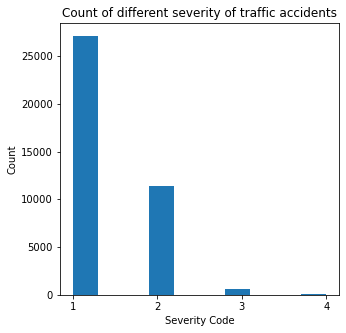

In [39]:

df['SEVERITYCODE'].plot(kind='hist', figsize=(5,5))
plt.title("Count of different severity of traffic accidents")

new_ticks = np.linspace(1, 4, 4)
plt.xticks(new_ticks)

plt.xlabel("Severity Code")
plt.ylabel("Count")



In [54]:
df_weather = df[['WEATHER', 'SEVERITYCODE']]
df_weather.head(20)

,WEATHER,SEVERITYCODE
0,Raining,1
1,Clear,1
5,Clear,1
6,Clear,1
8,Overcast,1
9,Clear,1
10,Overcast,1
11,Overcast,1
12,Clear,1
13,Overcast,2


In [56]:
df['WEATHER'].replace('Unknown', np.nan, inplace=True)
df['WEATHER'].replace('Other', np.nan, inplace=True)

In [122]:
df['WEATHER'].unique()


array(['Raining', 'Clear', 'Overcast', nan, 'Snowing', 'Fog/Smog/Smoke',
       'Partly Cloudy', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind'], dtype=object)

In [123]:
df['WEATHER'].replace(np.nan,"Unknown", inplace=True)

In [124]:
df['COUNT'] = 1
df.head()


,X,Y,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,Month,Weekday,Hour,COUNT
0,-122.320757,47.609408,Block,1,Sideswipe,2,0,0,2,0,...,Wet,Dark - Street Lights On,NaN,NaN,11,N,1,2,15,1
1,-122.319561,47.662221,Block,1,Parked Car,2,0,0,2,0,...,Dry,Daylight,NaN,NaN,32,Y,1,1,8,1
5,-122.374194,47.564076,Block,1,Rear Ended,2,0,0,2,0,...,Dry,Daylight,NaN,NaN,14,N,6,3,17,1
6,-122.290734,47.709276,Block,1,Other,2,0,0,1,0,...,Wet,Daylight,NaN,Y,50,N,2,0,9,1
8,-122.336565,47.590398,Intersection,1,Sideswipe,2,0,0,2,0,...,Dry,Daylight,NaN,NaN,81,N,1,3,8,1


In [73]:
df_weather=df.groupby('WEATHER', axis=0).sum()

df_weather

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,Month,Weekday,Hour,COUNT
WEATHER,,,,,,,,,,,,,,
Blowing Sand/Dirt,-1.223288e+03,4.765610e+02,14,24,0,0,23,4,0,0,82,16,160,11
Clear,-2.781186e+06,1.082646e+06,31308,59403,809,600,46070,10375,450,63,148553,68006,223019,23213
Fog/Smog/Smoke,-1.492429e+04,5.809141e+03,171,304,0,0,241,63,1,0,1101,379,1035,126
Overcast,-7.054804e+05,2.746316e+05,7866,14986,207,112,11616,2544,111,11,37609,17077,53586,5888
Partly Cloudy,-1.223079e+02,4.754698e+01,2,2,0,0,2,1,0,0,2,3,20,1
Raining,-8.390618e+05,3.266137e+05,9618,18303,302,75,13933,3309,110,11,46768,21765,67722,7081
Severe Crosswind,-3.670504e+02,1.431120e+02,3,6,0,0,5,0,0,0,19,7,51,3
Sleet/Hail/Freezing Rain,-3.302901e+03,1.285942e+03,32,56,1,0,50,5,0,0,92,108,257,27
Snowing,-1.529176e+04,5.953120e+03,150,280,3,0,247,25,2,0,702,311,760,128


In [74]:
df_weather.drop(['Partly Cloudy','Severe Crosswind'], axis=0, inplace=True)

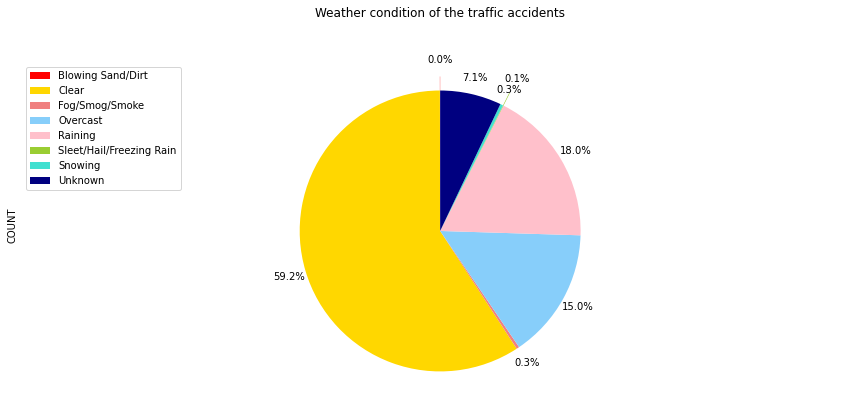

In [75]:
colors_list = ['red', 'gold', 'lightcoral', 'lightskyblue', 'pink','yellowgreen','turquoise','navy']
explode_list = [0.1, 0, 0, 0, 0, 0.1,0,0] # ratio for each continent with which to offset each wedge.

df_weather['COUNT'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Weather condition of the traffic accidents', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_weather.index, loc='upper left') 

plt.show()


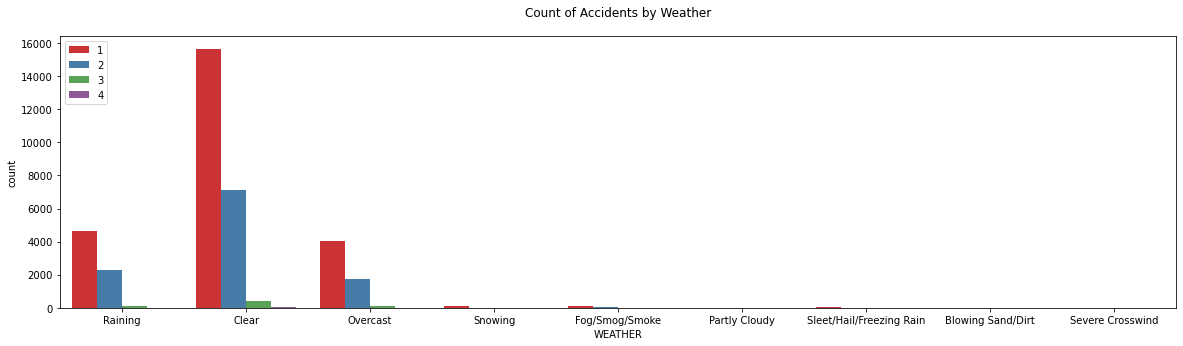

In [98]:
plt.figure(figsize=(20,5))
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Weather', y=1.05)
plt.show()

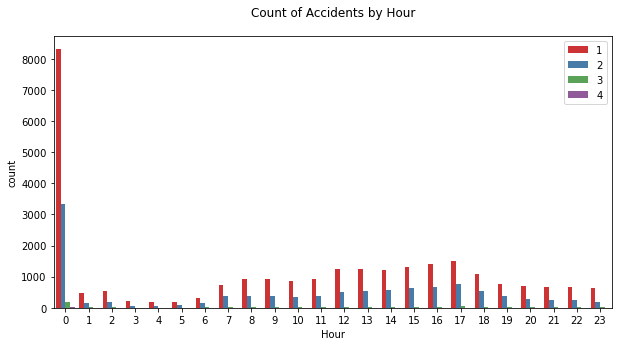

In [117]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', hue='SEVERITYCODE', data=df, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Hour', y=1.05)
plt.show()

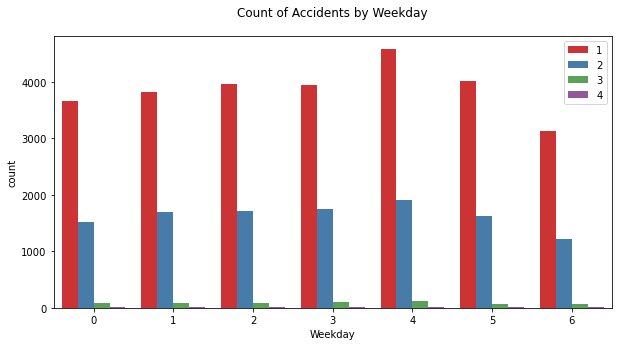

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='SEVERITYCODE', data=df, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Weekday', y=1.05)
plt.show()

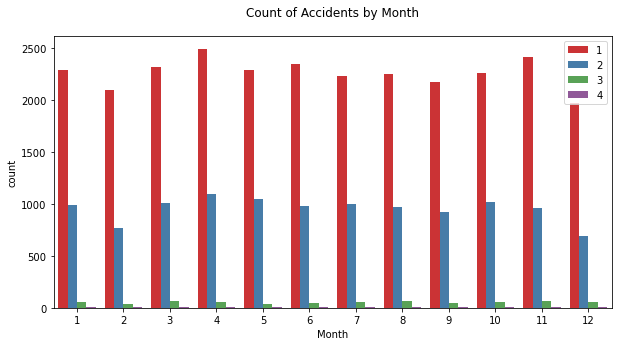

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='SEVERITYCODE', data=df, palette="Set1")
plt.legend(loc='best', prop={'size': 10})
plt.title('Count of Accidents by Month', y=1.05)
plt.show()

Inspect Address type for the traffic accidents.

In [120]:
df['ADDRTYPE'].value_counts(normalize=True, ascending=False, dropna=False)

Block           0.668178
Intersection    0.322037
Alley           0.005274
NaN             0.004510
Name: ADDRTYPE, dtype: float64

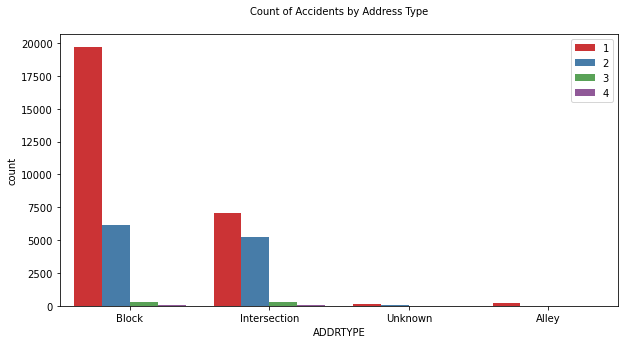

In [131]:
df['ADDRTYPE'].replace(np.nan,'Unknown', inplace=True)
plt.figure(figsize=(10,5))
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Address Type', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### Preparation for Predictive Modelling

In [136]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].astype('category')

In [137]:
df['SEVERITYCODE']

0        1
1        1
5        1
6        1
8        1
        ..
43771    1
43772    1
43773    1
43774    1
43775    2
Name: SEVERITYCODE, Length: 39247, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [138]:
df.replace({'WEATHER' : {np.nan : 'Unknown'}}, inplace=True)

In [139]:
df['COLLISIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False)

Parked Car    0.251306
Rear Ended    0.180014
Angles        0.172548
Other         0.154381
Sideswipe     0.089332
Left Turn     0.071445
Pedestrian    0.032130
Cycles        0.020358
Right Turn    0.012536
Head On       0.010931
NaN           0.005019
Name: COLLISIONTYPE, dtype: float64

In [140]:
df.replace({'COLLISIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

In [141]:
df['JUNCTIONTYPE'].value_counts(normalize=True, ascending=False,dropna=False)

Mid-Block (not related to intersection)              0.428568
At Intersection (intersection related)               0.316126
Mid-Block (but intersection related)                 0.163936
Driveway Junction                                    0.078248
NaN                                                  0.007109
At Intersection (but not related to intersection)    0.005504
Ramp Junction                                        0.000510
Name: JUNCTIONTYPE, dtype: float64

In [142]:
df.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

In [143]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

0      0.883405
N      0.063877
1      0.044921
NaN    0.005019
Y      0.002777
Name: UNDERINFL, dtype: float64

In [144]:
df.replace({'UNDERINFL' : {np.nan : 'Unknown', '0': 'N', '1': 'Y'}}, inplace=True)

In [145]:
df['UNDERINFL'].value_counts(normalize=True, ascending=False, dropna=False)

N          0.947283
Y          0.047698
Unknown    0.005019
Name: UNDERINFL, dtype: float64

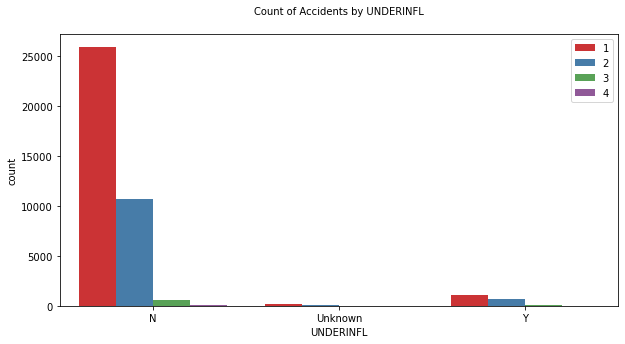

In [70]:
df=pd.read_csv('New-Data-Collision2')
plt.figure(figsize=(10,5))
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by UNDERINFL', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

<AxesSubplot:title={'center':'Under Influence Flag'}, xlabel='Under Influence', ylabel='Count'>

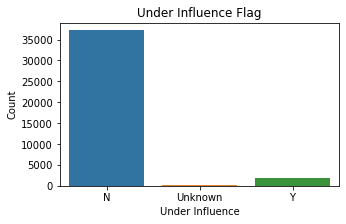

In [147]:
underinfluence = df.UNDERINFL.unique()
count_by_un=[]
for i in df.UNDERINFL.unique():
    count_by_un.append(df.loc[df.UNDERINFL == i, 'UNDERINFL'].count())
fig, ax = plt.subplots(figsize=(5,3))
ax.set(xlabel='Under Influence', ylabel='Count', title='Under Influence Flag')
sns.barplot(underinfluence, count_by_un)

In [148]:
df.replace({'ROADCOND' : {np.nan: 'Unknown'}}, inplace=True)

In [149]:
df.replace({'LIGHTCOND' : {np.nan: 'Unknown'}}, inplace=True)

In [150]:
df['HITPARKEDCAR'].value_counts(normalize=True, ascending=False,dropna=False).round(5)

N      0.99399
Y      0.00599
NaN    0.00003
Name: HITPARKEDCAR, dtype: float64

In [151]:
df.replace({'HITPARKEDCAR' : {np.nan: 'Unknown'}}, inplace=True)

In [152]:
df['ST_COLCODE'].value_counts(normalize=True, ascending=False,dropna=False)

32    0.232655
10    0.172548
14    0.140724
50    0.071776
11    0.059597
28    0.054628
13    0.035595
22    0.030907
23    0.021913
21    0.021046
45    0.019849
0     0.016027
15    0.015568
20    0.014855
16    0.012536
12    0.012358
2     0.008841
30    0.006701
26    0.005784
71    0.005784
1     0.005529
      0.005019
52    0.004306
81    0.003949
19    0.003796
24    0.003363
74    0.001885
51    0.001554
29    0.001249
27    0.001147
3     0.001096
73    0.000892
25    0.000866
4     0.000637
72    0.000535
57    0.000535
83    0.000484
64    0.000459
84    0.000433
40    0.000408
5     0.000280
65    0.000229
6     0.000204
66    0.000204
41    0.000178
82    0.000178
42    0.000153
56    0.000153
67    0.000153
48    0.000127
53    0.000102
31    0.000076
8     0.000025
49    0.000025
17    0.000025
43    0.000025
54    0.000025
Name: ST_COLCODE, dtype: float64

In [153]:
df.replace({'HITPARKEDCAR' : {' ': 'Unknown'}}, inplace=True)

See the numbers of injuries, serious injuries and fatalities in different severity condition.

In [154]:
df.groupby(
     ['SEVERITYCODE']
 ).agg(
     sum_INJURIES =            ('INJURIES','sum'),
     sum_SERIOUSINJURIES =     ('SERIOUSINJURIES','sum'),
     sum_FATALITIES =          ('FATALITIES','sum'),
 ).reset_index()

,SEVERITYCODE,sum_INJURIES,sum_SERIOUSINJURIES,sum_FATALITIES
0,1,0,0,0
1,2,15623,0,0
2,3,912,663,0
3,4,70,17,87


In [155]:
df['PEDROWNOTGRNT'].value_counts(normalize=True, ascending=False,dropna=False)

NaN    0.976329
Y      0.023671
Name: PEDROWNOTGRNT, dtype: float64

In [156]:
df.replace({'PEDROWNOTGRNT' : {np.nan: 'N'}}, inplace=True)

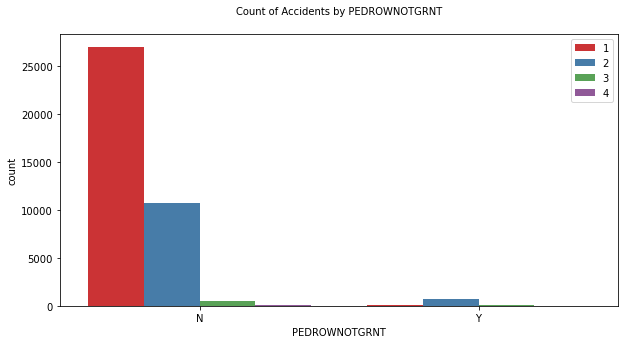

In [71]:
#df=pd.read_csv('New-Data-Collision2')
plt.figure(figsize=(10,5))
sns.countplot(x='PEDROWNOTGRNT', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by PEDROWNOTGRNT', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

In [157]:
df['SPEEDING'].value_counts(normalize=True, ascending=False,dropna=False)

NaN    0.943843
Y      0.056157
Name: SPEEDING, dtype: float64

In [158]:
df.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)

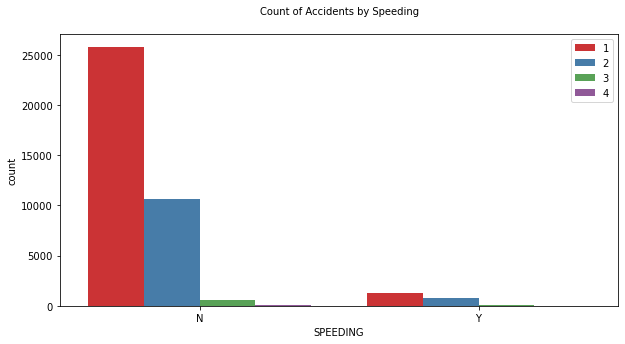

In [72]:
#df=pd.read_csv('New-Data-Collision2')
plt.figure(figsize=(10,5))
sns.countplot(x='SPEEDING', hue='SEVERITYCODE', data=df, palette="Set1")
plt.title('Count of Accidents by Speeding', size=10, y=1.05)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

In [159]:
df['INATTENTIONIND'].value_counts(normalize=True, ascending=False,dropna=False)

NaN    0.875379
Y      0.124621
Name: INATTENTIONIND, dtype: float64

In [160]:
df.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)

In [161]:
df['PERSONCOUNT'].value_counts(normalize=True, ascending=False,dropna=False)

2     0.601141
3     0.187836
4     0.076668
1     0.061610
5     0.036334
6     0.016842
0     0.007466
7     0.006472
8     0.002803
9     0.000994
10    0.000535
11    0.000382
12    0.000153
13    0.000127
14    0.000127
17    0.000102
37    0.000076
16    0.000051
44    0.000025
29    0.000025
15    0.000025
19    0.000025
53    0.000025
36    0.000025
22    0.000025
23    0.000025
26    0.000025
28    0.000025
30    0.000025
Name: PERSONCOUNT, dtype: float64

In [ ]:
ccc

In [162]:
filename='New-Data-Collision2'
df.to_csv(filename,index=False)


In [3]:
df=pd.read_csv('New-Data-Collision2')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['X', 'Y', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'HITPARKEDCAR', 'Month', 'Weekday', 'Hour', 'COUNT'],
      dtype='object')

In [8]:
df_M=df[[ 'SEVERITYCODE', 'ADDRTYPE','COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'HITPARKEDCAR']]
Features=['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE',
       'HITPARKEDCAR']

In [9]:
df_M.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,1,Block,Sideswipe,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N,N,11,N
1,1,Block,Parked Car,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,32,Y
2,1,Block,Rear Ended,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N,N,14,N
3,1,Block,Other,Mid-Block (but intersection related),N,N,Clear,Wet,Daylight,N,Y,50,N
4,1,Intersection,Sideswipe,At Intersection (intersection related),N,N,Overcast,Dry,Daylight,N,N,81,N


In [10]:
df_M[Features] = df_M[Features].astype('category')
df_M = pd.get_dummies(df_M, columns=Features, drop_first=True, dtype='int64')

df_M.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,ADDRTYPE_Unknown,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,...,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,HITPARKEDCAR_Unknown,HITPARKEDCAR_Y
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
df_M.drop(df_M.columns[df_M.columns.str.contains('Unknown')], axis=1, inplace=True)

In [12]:
filename = "Data-Collision-after-Feature"
df_M.to_csv(filename, index=False)

### Prediction Models

In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

Balance data

Since the data for high severity is much less than the other catogories, we need to balance the data to avoid the bias in prediction.


In [17]:
df_M['SEVERITYCODE'].value_counts(normalize=True, ascending=False,dropna=False)

1    0.690550
2    0.291436
3    0.015976
4    0.002038
Name: SEVERITYCODE, dtype: float64

In [18]:
df_M.columns

Index(['SEVERITYCODE', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended',
       ...
       'ST_COLCODE_71', 'ST_COLCODE_72', 'ST_COLCODE_73', 'ST_COLCODE_74',
       'ST_COLCODE_8', 'ST_COLCODE_81', 'ST_COLCODE_82', 'ST_COLCODE_83',
       'ST_COLCODE_84', 'HITPARKEDCAR_Y'],
      dtype='object', length=146)

In [20]:
df_M['Severity']=1
df_M.loc[df['SEVERITYCODE'] == 2, 'Severity'] = 2
df_M.loc[df['SEVERITYCODE'] == 3, 'Severity'] = 3
df_M.loc[df['SEVERITYCODE'] == 4, 'Severity'] = 4


In [22]:
df_M['Severity'].value_counts()

1    27102
2    11438
3      627
4       80
Name: Severity, dtype: int64

In [25]:
df_B =pd.concat([df_M[df_M['Severity']==1].sample(10000,replace=True),df_M[df_M['Severity']==2].sample(10000,replace=True),
                   df_M[df_M['Severity']==3].sample(10000,replace=True),df_M[df_M['Severity']==4].sample(10000,replace=True)], axis=0)

In [26]:
df_B.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,HITPARKEDCAR_Y,Severity
14997,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32650,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13881,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23212,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
14643,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
df_B['SEVERITYCODE'].value_counts()

4    10000
3    10000
2    10000
1    10000
Name: SEVERITYCODE, dtype: int64

In [28]:
filename = "Data-Collision-after-Balanced"
df_B.to_csv(filename, index=False)

In [49]:
df_B=pd.read_csv("Data-Collision-after-Balanced")
y = df_B['SEVERITYCODE']
X = df_B.drop('SEVERITYCODE', axis=1)


In [50]:
X=X.drop('Severity', axis=1)
X = StandardScaler().fit(X).transform(X)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [6]:
X_train.shape

(32000, 145)

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

# Classifier Model = Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
yhat = LR.predict(X_test)
yhat
LR_accuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.56225


In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print (classification_report(y_test, yhat))


Confusion matrix, without normalization
[[1177  595  117  105]
 [ 324 1085  382  225]
 [ 202  502  745  527]
 [  79  238  206 1491]]
              precision    recall  f1-score   support

           1       0.66      0.59      0.62      1994
           2       0.45      0.54      0.49      2016
           3       0.51      0.38      0.43      1976
           4       0.64      0.74      0.68      2014

   micro avg       0.56      0.56      0.56      8000
   macro avg       0.56      0.56      0.56      8000
weighted avg       0.56      0.56      0.56      8000



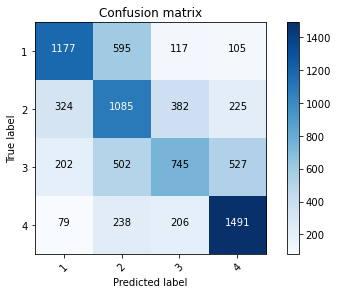

In [59]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix')


### K Nearest Neighbour (KNN)


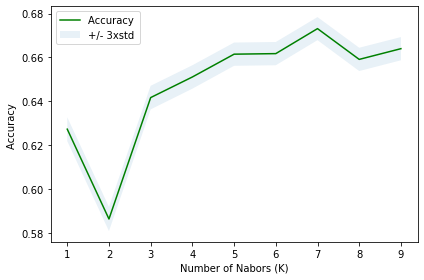

In [64]:
from sklearn.neighbors import KNeighborsClassifier
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for i in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat=knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
yhat=knn.predict(X_test)
knn_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.673125


Confusion matrix, without normalization
[[1171  556  218   49]
 [ 429 1102  396   89]
 [ 146  314 1335  181]
 [  63  125   49 1777]]
              precision    recall  f1-score   support

           1       0.65      0.59      0.62      1994
           2       0.53      0.55      0.54      2016
           3       0.67      0.68      0.67      1976
           4       0.85      0.88      0.86      2014

   micro avg       0.67      0.67      0.67      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.67      0.67      0.67      8000



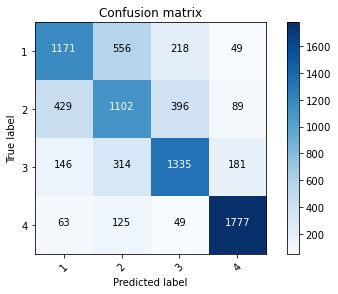

In [10]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix')

### SVM

In [61]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
yhat = clf.predict(X_test)
svm_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.655875


Confusion matrix, without normalization
[[1181  620  128   65]
 [ 328 1167  395  126]
 [ 164  458 1081  273]
 [  44  152    0 1818]]
              precision    recall  f1-score   support

           1       0.69      0.59      0.64      1994
           2       0.49      0.58      0.53      2016
           3       0.67      0.55      0.60      1976
           4       0.80      0.90      0.85      2014

   micro avg       0.66      0.66      0.66      8000
   macro avg       0.66      0.66      0.65      8000
weighted avg       0.66      0.66      0.65      8000



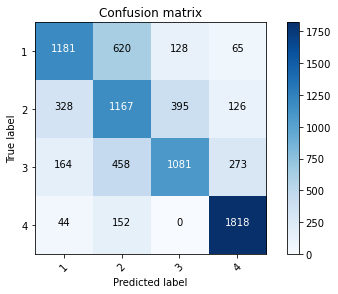

In [63]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix')

### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
Tree = DecisionTreeClassifier(min_samples_split = 5, max_features = 'log2', 
                                       class_weight='balanced', random_state=20)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [52]:
yhat = Tree.predict(X_test)
decision_tree_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.70825


Confusion matrix, without normalization
[[1133  627  176   58]
 [ 285 1297  332  102]
 [  74  331 1361  210]
 [  44   95    0 1875]]
              precision    recall  f1-score   support

           1       0.74      0.57      0.64      1994
           2       0.55      0.64      0.59      2016
           3       0.73      0.69      0.71      1976
           4       0.84      0.93      0.88      2014

   micro avg       0.71      0.71      0.71      8000
   macro avg       0.71      0.71      0.71      8000
weighted avg       0.71      0.71      0.71      8000



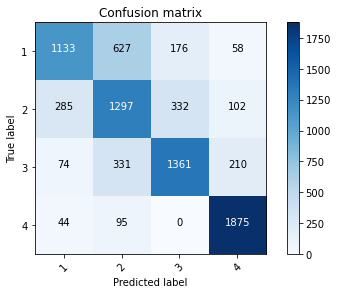

In [53]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4])

# Plot non-normalized confusion matrix
plt.figure
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4],normalize= False,  title='Confusion matrix')

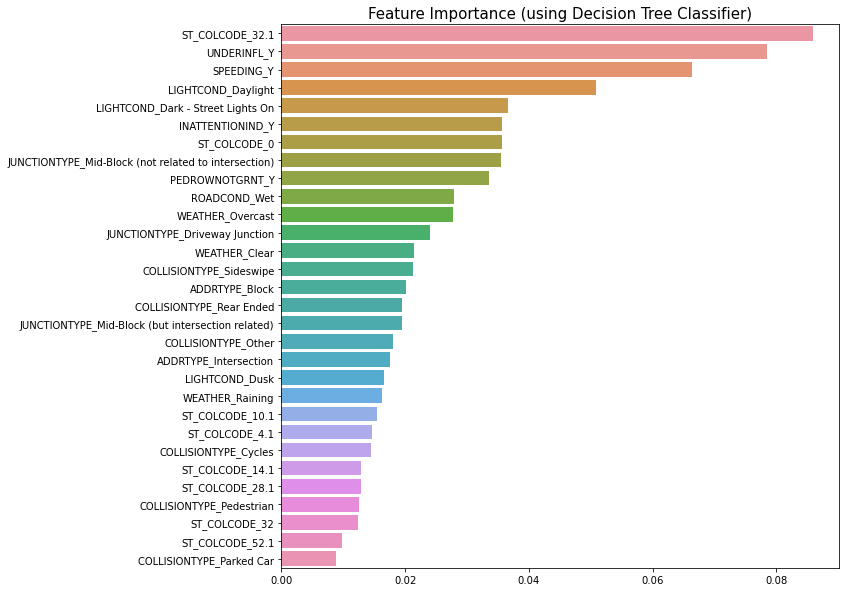

In [54]:
df_BX=df_B.drop('SEVERITYCODE',axis=1)
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df_BX.drop('Severity',axis=1).columns)

importances.iloc[:,0] = Tree.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importancestop = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importancestop.index, data=importancestop)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Feature Importance (using Decision Tree Classifier)', size=15)

plt.show()

Evaluation

In [66]:
Eva_Multiclass=pd.DataFrame(data={'Algorithm':["LR","KNN","SVM","Decision Tree"], 'Accuracy':["56.23%", "67.31%", "65.59%", "70.83%"]})
#Eva_Multiclass.set_index('Algorithm',inplace=True)
Eva_Multiclass

,Algorithm,Accuracy
0,LR,56.23%
1,KNN,67.31%
2,SVM,65.59%
3,Decision Tree,70.83%


### Two-Class

Since the test accuracy of the multiple-class prediction model is not very high, here we can rearrange the severity code to 2 classes. Severity=0 contains SEVERITYCODE=1,2(2—injury, 1—prop damage). Severity=1 contains SEVERITYCODE=2b,3(3—fatality, 2b—serious injury).

In [4]:
df_T=pd.read_csv("Data-Collision-after-Feature")
df_T.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ST_COLCODE_71.1,ST_COLCODE_72.1,ST_COLCODE_73.1,ST_COLCODE_74.1,ST_COLCODE_8,ST_COLCODE_81.1,ST_COLCODE_82.1,ST_COLCODE_83.1,ST_COLCODE_84.1,HITPARKEDCAR_Y
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
df_T.SEVERITYCODE.value_counts()

1    27102
2    11438
3      627
4       80
Name: SEVERITYCODE, dtype: int64

In [9]:
df_T['Severity']=1
df_T.loc[df_T['SEVERITYCODE'] == 1, 'Severity'] = 0
df_T.loc[df_T['SEVERITYCODE'] == 2, 'Severity'] = 0
df_T.Severity.value_counts()


0    38540
1      707
Name: Severity, dtype: int64

In [10]:
df_BT =pd.concat([df_T[df_T['Severity']==1].sample(10000,replace=True),df_T[df_T['Severity']==0].sample(10000,replace=True)], axis=0)
df_BT.Severity.value_counts()

1    10000
0    10000
Name: Severity, dtype: int64

In [11]:
df_BT.head()

,SEVERITYCODE,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ST_COLCODE_72.1,ST_COLCODE_73.1,ST_COLCODE_74.1,ST_COLCODE_8,ST_COLCODE_81.1,ST_COLCODE_82.1,ST_COLCODE_83.1,ST_COLCODE_84.1,HITPARKEDCAR_Y,Severity
31873,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15934,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36048,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20985,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21702,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df_BT.SEVERITYCODE.value_counts()

3    8847
1    7023
2    2977
4    1153
Name: SEVERITYCODE, dtype: int64

In [14]:
filename='Two-Class-Balenced-Collision'
df_BT.to_csv(filename,index=False)

In [18]:
y = df_BT['Severity']
X = df_BT.drop('SEVERITYCODE', axis=1)
X=X.drop('Severity', axis=1)
X = StandardScaler().fit(X).transform(X)



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [19]:

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Logistic Regression

Test set Accuracy:  0.75875
Confusion matrix, without normalization
[[1625  395]
 [ 570 1410]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2020
           1       0.78      0.71      0.75      1980

   micro avg       0.76      0.76      0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



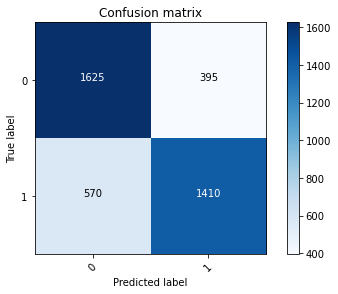

In [22]:
from sklearn.linear_model import LogisticRegression

# Classifier Model = Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

yhat = LR.predict(X_test)
yhat
LR_accuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

### K Nearest Neighbours

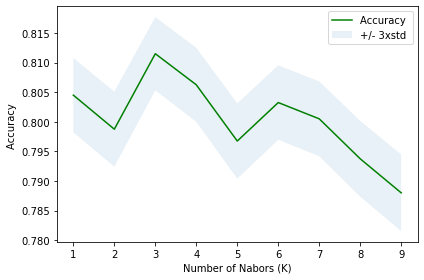

In [23]:
from sklearn.neighbors import KNeighborsClassifier
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for i in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat=knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8115 with k= 3


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
yhat=knn.predict(X_test)
knn_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.8115


Confusion matrix, without normalization
[[1494  526]
 [ 228 1752]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2020
           1       0.77      0.88      0.82      1980

   micro avg       0.81      0.81      0.81      4000
   macro avg       0.82      0.81      0.81      4000
weighted avg       0.82      0.81      0.81      4000



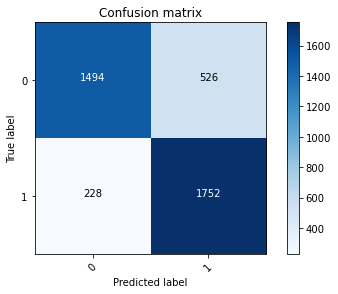

In [28]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

### SVM

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test set Accuracy:  0.785
Confusion matrix, without normalization
[[1666  354]
 [ 506 1474]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2020
           1       0.81      0.74      0.77      1980

   micro avg       0.79      0.79      0.79      4000
   macro avg       0.79      0.78      0.78      4000
weighted avg       0.79      0.79      0.78      4000



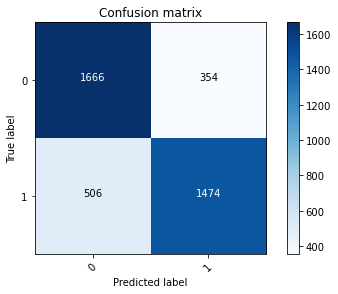

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat=clf.predict(X_test)
svm_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

### Decision Tree

Test set Accuracy:  0.83675
Confusion matrix, without normalization
[[1612  408]
 [ 245 1735]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2020
           1       0.81      0.88      0.84      1980

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000



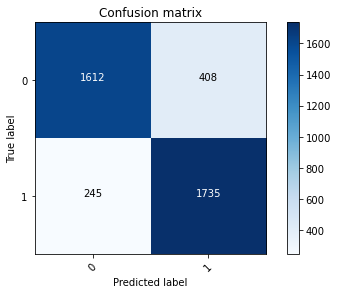

In [47]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(min_samples_split = 5, max_features = 'log2', 
                                       class_weight='balanced', random_state=20)
Tree.fit(X_train,y_train)
yhat = Tree.predict(X_test)
decision_tree_acuuracy=metrics.accuracy_score(y_test, yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

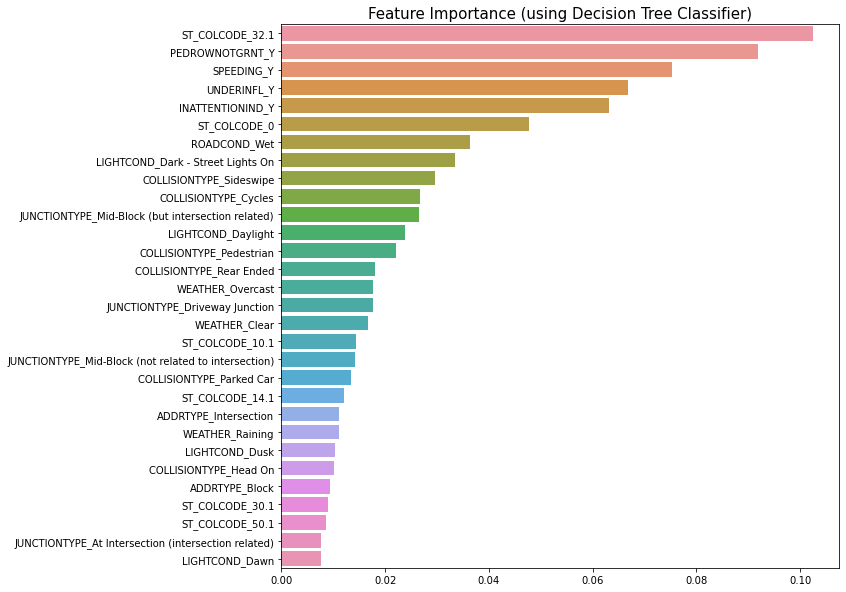

In [48]:
df_BTX=df_BT.drop('SEVERITYCODE',axis=1)
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df_BTX.drop('Severity',axis=1).columns)

importances.iloc[:,0] = Tree.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importancestop = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importancestop.index, data=importancestop)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Feature Importance (using Decision Tree Classifier)', size=15)

plt.show()

Evaluation

In [65]:
Eva_Multiclass=pd.DataFrame(data={'Algorithm':["LR","KNN","SVM","Decision Tree"], 'Accuracy':["75.88%", "81.15%", "78.56%", "83.68%"]})
#Eva_Multiclass.set_index('Algorithm',inplace=True)
Eva_Multiclass

,Algorithm,Accuracy
0,LR,75.88%
1,KNN,81.15%
2,SVM,78.56%
3,Decision Tree,83.68%


### Conclusion

This project analysed the relationship in main factors and the severity of traffic collisions.The predictive models are built in LR, KNN, SVM and Decision Tree algorithms. Besides the original severitycode degree, this project also makes a two-class level severity code. We can conclude that Decision Tree has the best predicting accuracy in Multiple-Class and Two-Class models.